In [3]:
from keras.models import model_from_json
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plot
import time

In [4]:
def LoadImage(name, path):
    img = Image.open(os.path.join(path, name))
    img = np.array(img)
    
    image = img[:,:256]
    mask = img[:,256:]
    
    return image, mask

In [5]:
valid_folder = './images'

In [7]:
import cv2
m='113.jpg'
m,tru=LoadImage(m, valid_folder)
i=np.asarray(m)
i=i.reshape((1,256,256,3))
i.shape

ModuleNotFoundError: No module named 'cv2'

In [2]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

model = tf.keras.models.load_model("./model.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_quant_model = converter.convert()
#save converted quantization model to tflite format
open("./quantization.tflite", "wb").write(tflite_quant_model)

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path='quantized_model.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Set up your input data.
input_data = i

# Invoke the model on the input data
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

# Get the result 
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

2022-06-05 12:57:11.434635: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-05 12:57:11.444942: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-05 12:57:11.452137: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mohilu20): /proc/driver/nvidia/version does not exist
2022-06-05 12:57:11.521770: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-05 12:57:13.406023: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 37748736 exceeds 1

Loaded model from disk


NameError: name 'tf' is not defined

In [6]:
def addColors(gg):
        im = np.zeros([gg.shape[0],gg.shape[1],3],dtype=np.uint8)
        for i in range(gg.shape[0]):
             for u in range(gg.shape[1]):
                if gg[i,u]==0:
                        im[i,u]=np.array( [7.97324365,  100.09284559, 3.3311774 ])# np.array([106.90082868, 139.99479298,  36.44992868]) #dirty-green
                if gg[i,u]==12:
                        im[i,u]= np.array([125.15370551, 128.00683271, 102.70661342]) 
                if gg[i,u]==11:
                        im[i,u]= np.array( [205.10936684, 155.91383531, 158.10853995])
                if gg[i,u]==10:
                        im[i,u]= np.array([202.89782929,  26.40039899,  61.60446492])
                if gg[i,u]==9:
                        im[i,u]= np.array([ 69.55103943,  70.40548991,  69.17557542])#road
                if gg[i,u]==8:
                        im[i,u]=np.array( [127.97324365,  63.09284559, 127.3311774 ])
       
                if gg[i,u]==7:
                        im[i,u]=np.array([ 76.50791694, 126.13882776, 172.87875815]) #sky
                if gg[i,u]==6:
                        im[i,u]=np.array( [157.75659272, 245.35283586, 155.30654771]) #road-dividers
                if gg[i,u]==4:
                        im[i,u]=np.array([ 80.53963208,   6.04446257,  71.14193837]) #buildings
                if gg[i,u]==5:
                        im[i,u]= np.array( [  3.55582649,   3.56494346, 136.37082893])#vehicles
                if gg[i,u]==3:
                        im[i,u]=np.array( [237.59908029,  39.26874128, 225.79570494])
                if gg[i,u]==2:
                        im[i,u]=np.array([  4.1605802 ,   3.27185434,   6.7030066 ])
                if gg[i,u]==1:
                        im[i,u]=np.array( [214.7472683 , 206.44713466,  33.15308545])
                #if gg[i,u]==0:
                 #       im[i,u]=np.array([0,128,0])
        return im

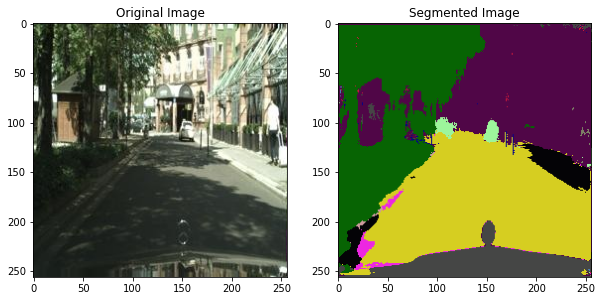

In [7]:
r=loaded_model.predict(i)
r=r.reshape((256,256,-1))
s=addColors(np.argmax(r, axis=-1))

fig, axs = plot.subplots(1, 2, figsize=(10,10))
axs[0].imshow(m)
axs[0].set_title('Original Image')
axs[1].imshow(s)
axs[1].set_title('Segmented Image')
plot.show()

0.8478925228118896
0.8201935291290283
0.7998008728027344
0.809027910232544
0.7907230854034424
0.8324646949768066
0.792494535446167
0.7913691997528076
0.8001036643981934
0.9280877113342285
Mean Time:  0.8212157726287842


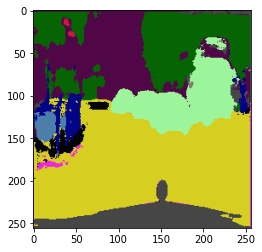

In [16]:
t = []
for i in range(10):
    start_time = time.time()
    n = 110+i
    m = str(n)+'.jpg'
    m,tru=LoadImage(m, valid_folder)
    i=np.asarray(m)
    i=i.reshape((1,256,256,3))
    i.shape
    r=loaded_model.predict(i)
    r=r.reshape((256,256,-1))
    s=addColors(np.argmax(r, axis=-1))
    plot.imshow(s)
    end_time = time.time()
    elapsed = end_time - start_time
    t.append(elapsed)
    print(elapsed)
t = np.array(t)
print("Mean Time: ", np.mean(t))

In [9]:
pip install -q tensorflow-model-optimization

Note: you may need to restart the kernel to use updated packages.


In [10]:
import tensorflow_model_optimization as tfmot

In [11]:
import tensorflow as tf
import tensorflow_model_optimization as tfmot


pruning_schedule = tfmot.sparsity.keras.PolynomialDecay(
                      initial_sparsity=0.0, final_sparsity=0.5,
                      begin_step=2000, end_step=4000)

model_for_pruning = tfmot.sparsity.keras.prune_low_magnitude(
    loaded_model, pruning_schedule=pruning_schedule)


c:\Users\sande\anaconda3\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:212: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  mask = self.add_variable(
c:\Users\sande\anaconda3\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:219: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  threshold = self.add_variable(
c:\Users\sande\anaconda3\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:233: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.pruning_step = self.add_variable(


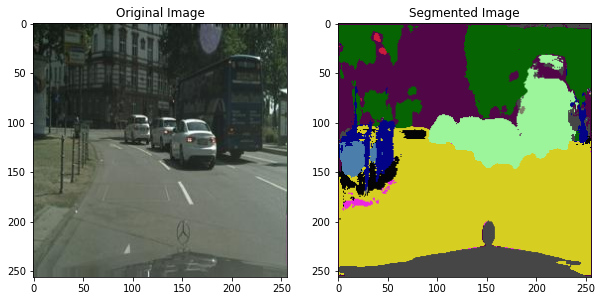

In [13]:
r=model_for_pruning.predict(i)
r=r.reshape((256,256,-1))
s=addColors(np.argmax(r, axis=-1))

fig, axs = plot.subplots(1, 2, figsize=(10,10))
axs[0].imshow(m)
axs[0].set_title('Original Image')
axs[1].imshow(s)
axs[1].set_title('Segmented Image')
plot.show()

0.8742396831512451
0.842918872833252
0.8478991985321045
0.8838129043579102
0.983381986618042
1.1591157913208008
1.1742312908172607
1.149789810180664
1.1419825553894043
1.108004093170166
Mean Time:  1.016537618637085


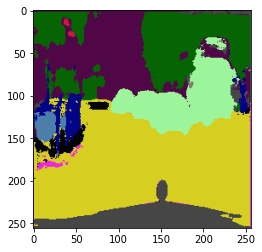

In [15]:
t = []
for i in range(10):
    start_time = time.time()
    n = 110+i
    m = str(n)+'.jpg'
    m,tru=LoadImage(m, valid_folder)
    i=np.asarray(m)
    i=i.reshape((1,256,256,3))
    i.shape
    r=model_for_pruning.predict(i)
    r=r.reshape((256,256,-1))
    s=addColors(np.argmax(r, axis=-1))
    plot.imshow(s)
    end_time = time.time()
    elapsed = end_time - start_time
    t.append(elapsed)
    print(elapsed)
t = np.array(t)
print("Mean Time: ", np.mean(t))